<a href="https://colab.research.google.com/github/sharithomas/ML-AI/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

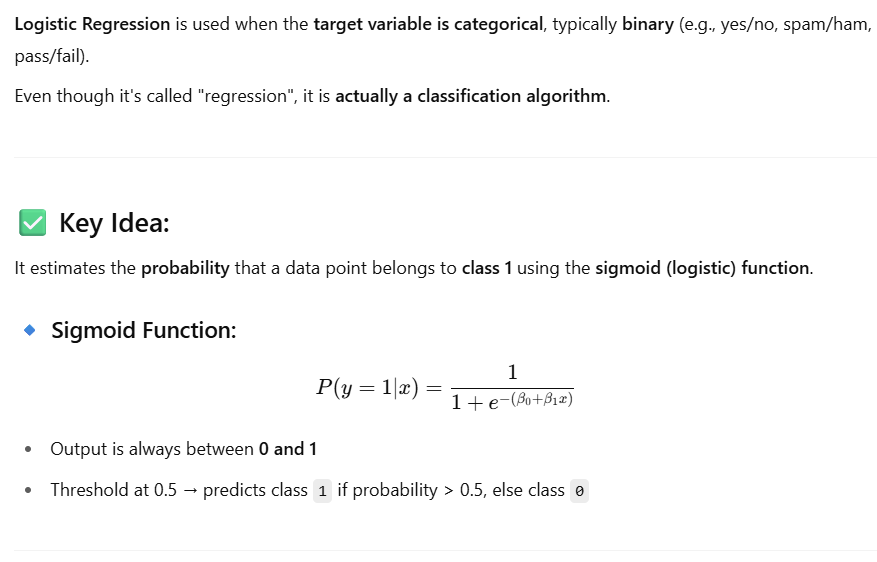

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv('marks.csv')
X=dataset.iloc[:,0].values
y=dataset.iloc[:,1].values

X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [3]:
X.shape
y.shape

(100, 1)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
classifier.coef_
classifier.intercept_

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-11.2823378])

In [8]:
#Prediction
y_pred_train=classifier.predict(X_train)
y_pred_test=classifier.predict(X_test)

In [9]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_train=confusion_matrix(y_train,y_pred_train)
cm_test=confusion_matrix(y_test,y_pred_test)

In [10]:
#Check Accuracy
from sklearn.metrics import accuracy_score
cm_train_acc=accuracy_score(y_train,y_pred_train)
cm_test_acc=accuracy_score(y_test,y_pred_test)
cm_train_acc

1.0

In [11]:
cm_test_acc

1.0

**Example for Logistic Regression**

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('Marks_290720_1.csv')

from sklearn.model_selection import train_test_split
#np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

y_train=df_train.pop('Result')
X_train=df_train

y_test=df_test.pop('Result')
X_test=df_test

In [14]:
df.head()

,Hour_Study,IQ,University,FTM,Result
0,0,32,3,3,0
1,0,36,1,4,0
2,0,31,1,3,0
3,3,62,2,6,0
4,4,30,3,3,0


In [15]:
import statsmodels.api as sm
logm=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
classifier=logm.fit()
classifier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Result   No. Observations:                   70
Model:                            GLM   Df Residuals:                       65
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18.685
Date:                Mon, 07 Jul 2025   Deviance:                       37.370
Time:                        08:33:23   Pearson chi2:                     39.8
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1621
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.7123      3.540     -3.026      0.002     -17.650      -3.775
Hour_Study     0.2772      0.318      0.871      0.384      -0.347       0.901
IQ            -0.0225      0.162     -0.139      0.890      -0.339       0.294
University     1.4775      0.636      2.325      0.020       0.232       2.723
FTM            0.9062      1.592      0.569      0.569      -2.213       4.026
==============================================================================
"""

In [16]:
y_pred_train=classifier.predict(sm.add_constant(X_train))
type(y_pred_train)
len(y_pred_train)
len(set(y_pred_train)) # unique values

66

In [22]:
y_pred_train.head()

,0
32,0.135518
6,0.104757
3,0.053093
12,0.009551
51,0.460450


,Hour_Study,IQ,University,FTM
Hour_Study,1.000000,-0.071348,0.019182,-0.053729
IQ,-0.071348,1.000000,-0.049239,0.982106
University,0.019182,-0.049239,1.000000,-0.058089
FTM,-0.053729,0.982106,-0.058089,1.000000


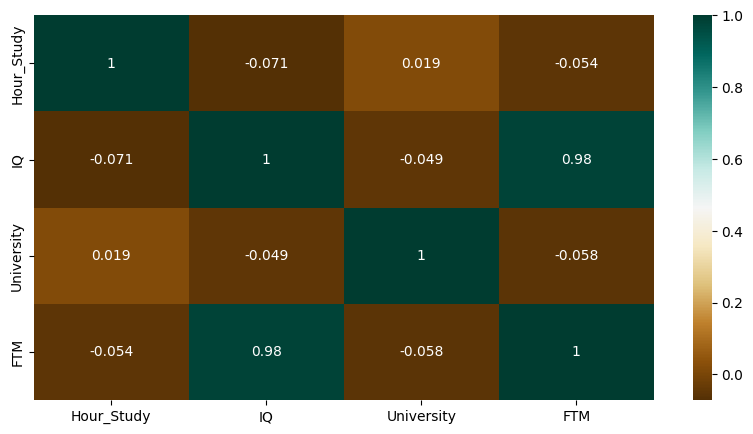

In [19]:
#Heatmap
plt.figure(figsize=(10,5))
c=X_train.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,IQ,357.24
3,FTM,352.51
2,University,4.61
0,Hour_Study,2.42


In [23]:
#removing least significant variable
X_train=X_train.drop(['IQ'],axis=1)

KeyError: "['IQ'] not found in axis"

In [24]:
#Again fit model
import statsmodels.api as sm
logm=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
classifier=logm.fit()
classifier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Result   No. Observations:                   70
Model:                            GLM   Df Residuals:                       66
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18.695
Date:                Mon, 07 Jul 2025   Deviance:                       37.389
Time:                        08:52:18   Pearson chi2:                     39.8
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1619
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.7366      3.529     -3.043      0.002     -17.652      -3.821
Hour_Study     0.2890      0.307      0.942      0.346      -0.313       0.891
University     1.4680      0.627      2.340      0.019       0.238       2.698
FTM            0.6895      0.309      2.233      0.026       0.084       1.295
==============================================================================
"""

In [25]:
X_train=X_train.drop(['Hour_Study'],axis=1)


X_test=X_test.drop(['IQ'],axis=1)
X_test=X_test.drop(['Hour_Study'],axis=1)

In [26]:
import statsmodels.api as sm
logm=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
classifier=logm.fit()
classifier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Result   No. Observations:                   70
Model:                            GLM   Df Residuals:                       67
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19.157
Date:                Mon, 07 Jul 2025   Deviance:                       38.314
Time:                        08:53:03   Pearson chi2:                     40.7
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1508
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4737      3.065     -3.091      0.002     -15.481      -3.466
University     1.4117      0.615      2.294      0.022       0.206       2.618
FTM            0.5998      0.284      2.111      0.035       0.043       1.157
==============================================================================
"""

In [27]:
y_pred_train=classifier.predict(sm.add_constant(X_train))
type(y_pred_train)
len(y_pred_train)
len(set(y_pred_train))

22

<Axes: >

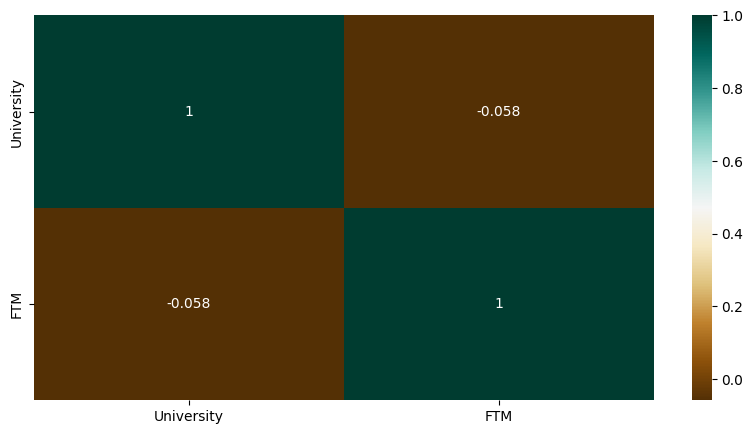

In [29]:
plt.figure(figsize=(10,5))
c=X_train.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Featurs']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Featurs,VIF
0,University,4.25
1,FTM,4.25


In [32]:
y_train_pred_final=pd.DataFrame({'Result':y_train.values,'Result_prob':y_pred_train})
y_train_pred_final['predicted']=y_train_pred_final.Result_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Result,Result_prob,predicted
32,0,0.096233,0
6,0,0.162460,0
3,0,0.045143,0
12,0,0.014046,0
51,1,0.443162,0


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_pred_final.Result,y_train_pred_final.predicted))

0.8714285714285714


In [34]:
confusion=confusion_matrix(y_train_pred_final.Result,y_train_pred_final.predicted)
confusion

array([[61,  1],
       [ 8,  0]])

In [35]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [36]:
sens=TP/float(TP+FN) #sensitivity- more importance for 1's
spec=TN/float(TN+FP) #specificity - more importance for 0's

print(FP/float(FP+TN)) #false positive rate

print(TP/float(TP+FP))#positive predict value
print(TN/float(FN+TN))#negative predict value

0.016129032258064516
0.0
0.8840579710144928


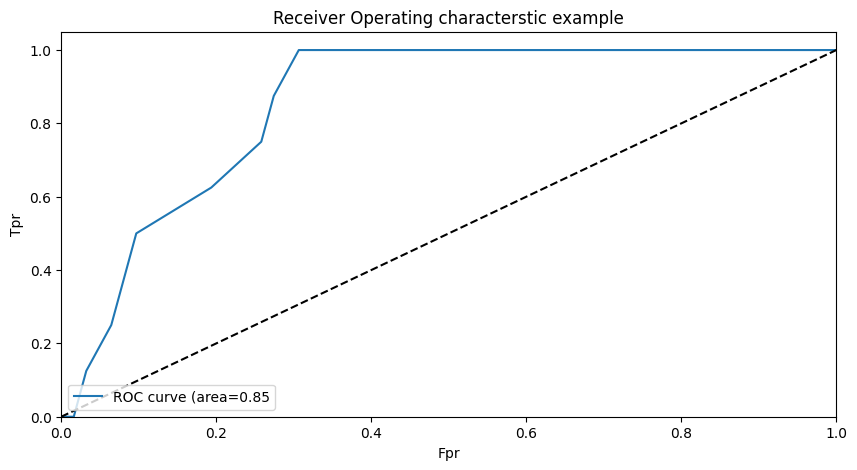

In [37]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score

def draw_roc(actual,prob):
    fpr,tpr,threshold=roc_curve(y_train_pred_final.Result,y_train_pred_final.Result_prob,drop_intermediate=False)
    acu_score=roc_auc_score(y_train_pred_final.Result,y_train_pred_final.Result_prob)
    plt.figure(figsize=(10,5))
    plt.plot(fpr,tpr,label="ROC curve (area=%0.2f" %acu_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("Fpr")
    plt.ylabel("Tpr")
    plt.title("Receiver Operating characterstic example")
    plt.legend(loc="lower left")
    plt.show()
    return None

fpr,tpr,thresholds=roc_curve(y_train_pred_final.Result,y_train_pred_final.Result_prob,drop_intermediate=False)
type(thresholds)
thresholds.shape
fpr.shape
tpr.shape


draw_roc(y_train_pred_final.Result, y_train_pred_final.Result_prob)